In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
#from keras.layers import BatchNormalization




Using TensorFlow backend.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/xray_files/kids/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
hyper_dimension = 500
hyper_epochs = 10
hyper_batch_size = 16
hyper_feature_maps = 32
hyper_channels = 1
hyper_mode = 'grayscale'

In [ ]:

# Initializing the CNN
classifier = Sequential()


#https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-5546-z
# based on this article a 3L1_64U layer gives the highest accuracy on the most datasets in average. Therefore I build the module based on this theory.
# I used the BatchNormalization function to stadarize the imputs and reduce the epochs needed to train teh CNN
# Dropouts have been utilized to reduce the risk of over fitting


# Convolution & pooling - First convolution layer
classifier.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels)))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))


# Convolution & pooling - Second convolution layer
classifier.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))


# Convolution & pooling - Third convolution layer
classifier.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(128, activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))
# Second node layer
classifier.add(Dense(128, activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))
#third node layer
classifier.add(Dense(64, activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

#output layer with softmax for probaibility
classifier.add(Dense(2, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
#showing a summary of the above build network
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 498, 498, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 249, 249, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 249, 249, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 247, 247, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 121, 121, 64)     

In [ ]:
# Creating training and validation image flows

train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory(f'{root_path}train',
                                          target_size = (hyper_dimension,
                                                         hyper_dimension),
                                          batch_size = hyper_batch_size,
                                          class_mode = 'categorical',
                                          color_mode = hyper_mode)

val_set = val_gen.flow_from_directory(f'{root_path}val',
                                      target_size = (hyper_dimension,
                                                     hyper_dimension),
                                      batch_size = hyper_batch_size,
                                      class_mode = 'categorical',
                                      color_mode = hyper_mode)

Found 4846 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


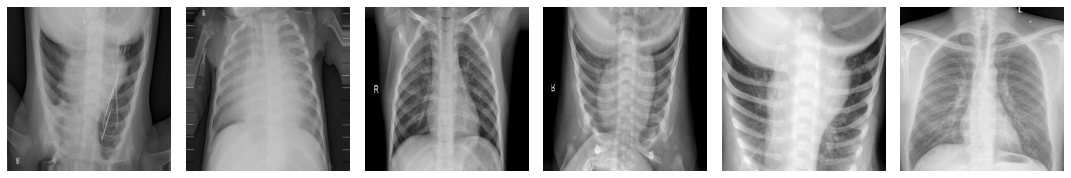

In [ ]:
# Visualizing images in the first training set batch 

image_batch = train_set[0][0]

plt.figure(figsize=(20,5))
for i in range(len(image_batch)):
    plt.subplot(2,8,i+1)
    pil_img = array_to_img(image_batch[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

Epoch 1/5
808/808 [==============================] - 1810s 2s/step - loss: 0.5530 - accuracy: 0.7433 - val_loss: 0.0100 - val_accuracy: 0.8971
Epoch 2/5
808/808 [==============================] - 200s 248ms/step - loss: 0.5033 - accuracy: 0.7662 - val_loss: 1.1906 - val_accuracy: 0.9096
Epoch 3/5
808/808 [==============================] - 198s 245ms/step - loss: 0.4483 - accuracy: 0.7947 - val_loss: 0.2156 - val_accuracy: 0.9337
Epoch 4/5
808/808 [==============================] - 198s 245ms/step - loss: 0.3798 - accuracy: 0.8265 - val_loss: 0.0017 - val_accuracy: 0.9365
Epoch 5/5
808/808 [==============================] - 196s 243ms/step - loss: 0.3378 - accuracy: 0.8535 - val_loss: 0.4291 - val_accuracy: 0.9375


In [ ]:
# Creating test image flow

test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory(f'{root_path}/test',
                                        target_size = (hyper_dimension,
                                                       hyper_dimension),
                                        batch_size = 1,
                                        class_mode = 'categorical',
                                        color_mode = hyper_mode,
                                        shuffle=False)




Found 770 images belonging to 2 classes.


In [ ]:
# Making predictions (in form of a probability tuple)

predictions = classifier.predict(test_set)

In [ ]:
#clasify the prediction to its class

y_classes = predictions.argmax(axis=-1)

In [ ]:
# Confusion matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, y_classes, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,164,142
Actual Pneumonia,38,426


In [ ]:
#save the trained model
file_name = "3L64u3Ln2sm_kids"
classifier.save(f'{root_path}{file_name}.h5') 

In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

Epoch 1/5
808/808 [==============================] - 203s 251ms/step - loss: 0.3112 - accuracy: 0.8646 - val_loss: 0.5231 - val_accuracy: 0.9413
Epoch 2/5
808/808 [==============================] - 199s 246ms/step - loss: 0.2933 - accuracy: 0.8749 - val_loss: 0.0812 - val_accuracy: 0.9298
Epoch 3/5
808/808 [==============================] - 203s 251ms/step - loss: 0.2845 - accuracy: 0.8816 - val_loss: 0.0236 - val_accuracy: 0.9308
Epoch 4/5
808/808 [==============================] - 198s 245ms/step - loss: 0.2816 - accuracy: 0.8766 - val_loss: 8.4395e-04 - val_accuracy: 0.9423
Epoch 5/5
808/808 [==============================] - 198s 245ms/step - loss: 0.2712 - accuracy: 0.8875 - val_loss: 3.6173e-04 - val_accuracy: 0.9385


In [ ]:
#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 197s 244ms/step - loss: 0.2568 - accuracy: 0.8968 - val_loss: 1.0412e-04 - val_accuracy: 0.9413
Epoch 2/5
808/808 [==============================] - 195s 242ms/step - loss: 0.2524 - accuracy: 0.8987 - val_loss: 2.6605 - val_accuracy: 0.9010
Epoch 3/5
808/808 [==============================] - 199s 246ms/step - loss: 0.2596 - accuracy: 0.8910 - val_loss: 0.0531 - val_accuracy: 0.9423
Epoch 4/5
808/808 [==============================] - 206s 255ms/step - loss: 0.2369 - accuracy: 0.8993 - val_loss: 0.0292 - val_accuracy: 0.9394
Epoch 5/5
808/808 [==============================] - 193s 239ms/step - loss: 0.2423 - accuracy: 0.9003 - val_loss: 0.0026 - val_accuracy: 0.9481


In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 198s 245ms/step - loss: 0.2400 - accuracy: 0.9082 - val_loss: 9.2852e-04 - val_accuracy: 0.9452
Epoch 2/5
808/808 [==============================] - 195s 242ms/step - loss: 0.2427 - accuracy: 0.9003 - val_loss: 0.0629 - val_accuracy: 0.9481
Epoch 3/5
808/808 [==============================] - 196s 242ms/step - loss: 0.2333 - accuracy: 0.9073 - val_loss: 0.0018 - val_accuracy: 0.9471
Epoch 4/5
808/808 [==============================] - 196s 242ms/step - loss: 0.2235 - accuracy: 0.9100 - val_loss: 4.8993e-05 - val_accuracy: 0.9519
Epoch 5/5
808/808 [==============================] - 200s 248ms/step - loss: 0.2205 - accuracy: 0.9156 - val_loss: 0.0066 - val_accuracy: 0.9490


In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 201s 249ms/step - loss: 0.2647 - accuracy: 0.8929 - val_loss: 0.0011 - val_accuracy: 0.9327
Epoch 2/5
808/808 [==============================] - 198s 245ms/step - loss: 0.2741 - accuracy: 0.8838 - val_loss: 2.6643e-05 - val_accuracy: 0.9423
Epoch 3/5
808/808 [==============================] - 198s 245ms/step - loss: 0.2567 - accuracy: 0.8950 - val_loss: 0.1168 - val_accuracy: 0.9394
Epoch 4/5
808/808 [==============================] - 194s 240ms/step - loss: 0.2593 - accuracy: 0.8923 - val_loss: 0.0149 - val_accuracy: 0.9394
Epoch 5/5
808/808 [==============================] - 196s 243ms/step - loss: 0.2461 - accuracy: 0.8974 - val_loss: 8.9406e-06 - val_accuracy: 0.9423


In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 199s 247ms/step - loss: 0.2224 - accuracy: 0.9117 - val_loss: 0.0744 - val_accuracy: 0.9394
Epoch 2/5
808/808 [==============================] - 199s 246ms/step - loss: 0.2409 - accuracy: 0.9067 - val_loss: 0.0013 - val_accuracy: 0.9452
Epoch 3/5
808/808 [==============================] - 198s 244ms/step - loss: 0.2158 - accuracy: 0.9168 - val_loss: 3.3167 - val_accuracy: 0.9413
Epoch 4/5
808/808 [==============================] - 199s 246ms/step - loss: 0.2198 - accuracy: 0.9123 - val_loss: 6.0614e-05 - val_accuracy: 0.9404
Epoch 5/5
808/808 [==============================] - 198s 246ms/step - loss: 0.2101 - accuracy: 0.9187 - val_loss: 0.0044 - val_accuracy: 0.9442


In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 201s 248ms/step - loss: 0.2182 - accuracy: 0.9142 - val_loss: 0.0232 - val_accuracy: 0.9471
Epoch 2/5
808/808 [==============================] - 198s 245ms/step - loss: 0.2074 - accuracy: 0.9193 - val_loss: 0.0017 - val_accuracy: 0.9298
Epoch 3/5
808/808 [==============================] - 196s 242ms/step - loss: 0.2065 - accuracy: 0.9148 - val_loss: 0.0648 - val_accuracy: 0.9481
Epoch 4/5
808/808 [==============================] - 197s 243ms/step - loss: 0.2222 - accuracy: 0.9150 - val_loss: 0.0340 - val_accuracy: 0.9394
Epoch 5/5
808/808 [==============================] - 197s 244ms/step - loss: 0.2022 - accuracy: 0.9185 - val_loss: 0.0117 - val_accuracy: 0.9452


In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 199s 247ms/step - loss: 0.1951 - accuracy: 0.9206 - val_loss: 0.0056 - val_accuracy: 0.9452
Epoch 2/5
808/808 [==============================] - 198s 244ms/step - loss: 0.2144 - accuracy: 0.9189 - val_loss: 6.4320e-04 - val_accuracy: 0.9433
Epoch 3/5
808/808 [==============================] - 195s 242ms/step - loss: 0.2063 - accuracy: 0.9168 - val_loss: 0.0196 - val_accuracy: 0.9510
Epoch 4/5
808/808 [==============================] - 194s 240ms/step - loss: 0.2058 - accuracy: 0.9181 - val_loss: 0.0154 - val_accuracy: 0.9442
Epoch 5/5
808/808 [==============================] - 196s 243ms/step - loss: 0.1999 - accuracy: 0.9253 - val_loss: 0.0055 - val_accuracy: 0.9452


In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 197s 244ms/step - loss: 0.1975 - accuracy: 0.9245 - val_loss: 0.0012 - val_accuracy: 0.9471
Epoch 2/5
808/808 [==============================] - 194s 240ms/step - loss: 0.1971 - accuracy: 0.9232 - val_loss: 6.9428e-04 - val_accuracy: 0.9433
Epoch 3/5
808/808 [==============================] - 194s 240ms/step - loss: 0.1910 - accuracy: 0.9267 - val_loss: 0.4738 - val_accuracy: 0.9471
Epoch 4/5
808/808 [==============================] - 195s 241ms/step - loss: 0.1916 - accuracy: 0.9270 - val_loss: 0.0029 - val_accuracy: 0.9442
Epoch 5/5
808/808 [==============================] - 195s 241ms/step - loss: 0.2006 - accuracy: 0.9197 - val_loss: 0.1322 - val_accuracy: 0.9442


In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

#save the trained model
classifier.save(f'{root_path}{file_name}.h5') 

Epoch 1/5
808/808 [==============================] - 199s 246ms/step - loss: 0.1911 - accuracy: 0.9236 - val_loss: 0.1394 - val_accuracy: 0.9442
Epoch 2/5
808/808 [==============================] - 197s 244ms/step - loss: 0.1859 - accuracy: 0.9216 - val_loss: 5.9605e-07 - val_accuracy: 0.9413
Epoch 3/5
808/808 [==============================] - 197s 244ms/step - loss: 0.1954 - accuracy: 0.9267 - val_loss: 4.5952e-04 - val_accuracy: 0.9433
Epoch 4/5
808/808 [==============================] - 196s 242ms/step - loss: 0.1857 - accuracy: 0.9253 - val_loss: 0.0173 - val_accuracy: 0.9394
Epoch 5/5
808/808 [==============================] - 203s 251ms/step - loss: 0.1936 - accuracy: 0.9263 - val_loss: 0.0136 - val_accuracy: 0.9452
